In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVR
from sklearn.externals import joblib

%matplotlib inline
np.random.seed(42)

In [2]:
train_df = pd.read_csv("~/real_estate/data/v11/train_df.csv")
test_df = pd.read_csv("~/real_estate/data/v11/test_df.csv")

features = train_df.columns[:-2]

X_train = train_df[features]
X_test = test_df[features]
y_train = train_df["target"]
y_test = test_df["target"]

In [3]:
svr = SVR()
svr.fit(X_train, y_train)

/home/gnazareths/.local/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [4]:
# Predict
yhat_train = svr.predict(X_train)
yhat_test = svr.predict(X_test)

# Fetch errors
train_errors = yhat_train - y_train
test_errors = yhat_test - y_test

In [5]:
print("Mean test error: ", np.mean(abs(test_errors)))
print("Mean test value: ", np.mean(abs(y_test)))
print("R^2 test: ", np.square(np.corrcoef(yhat_test, y_test)[0,1]))
print('---')
print("Mean train error: ", np.mean(abs(train_errors)))
print("Mean train value: ", np.mean(abs(y_train)))
print("R^2 train: ", np.square(np.corrcoef(yhat_train, y_train)[0,1]))

Mean test error:  0.04363682337759266
Mean test value:  0.08922519154249424
R^2 test:  0.2985982196011058
---
Mean train error:  0.04796686554414706
Mean train value:  0.09625366871768301
R^2 train:  0.41918367768747705


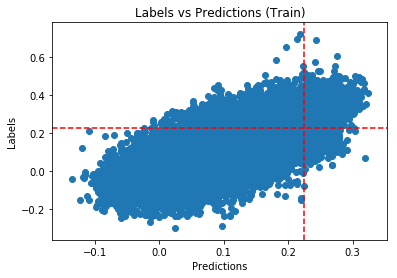

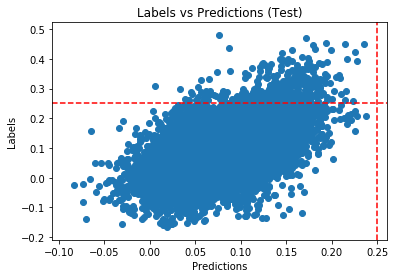

In [6]:
plt.scatter(yhat_train, y_train)
plt.title("Labels vs Predictions (Train)")
plt.ylabel("Labels")
plt.xlabel("Predictions")
plt.axvline(x=0.225, color="red", linestyle='--')
plt.axhline(y=0.225, color="r", linestyle='--')
plt.show()

plt.scatter(yhat_test, y_test)
plt.title("Labels vs Predictions (Test)")
plt.ylabel("Labels")
plt.xlabel("Predictions")
plt.axvline(x=0.25, color="red", linestyle='--')
plt.axhline(y=0.25, color="r", linestyle='--')
plt.show()

In [7]:
predictive_df = pd.DataFrame({"label": y_test.values, "pred": yhat_test})
predictive_df = predictive_df.sort_values(by=["pred"], ascending=False)

predictive_df_25 = predictive_df.loc[predictive_df["pred"] >= .25]
top_10_predictions = predictive_df.head(n=10)
top_25_predictions = predictive_df.head(n=25)

mean_return_over_25 = np.mean(predictive_df_25["label"].values)
mean_return_top_10_predictions = np.mean(top_10_predictions["label"].values)
mean_return_top_25_predictions = np.mean(top_25_predictions["label"].values)

print("Mean return for predictions above 25%: ", mean_return_over_25)
print("Mean return for top 10 predictions: ", mean_return_top_10_predictions)
print("Mean return for top 25 predictions: ", mean_return_top_25_predictions)

Mean return for predictions above 25%:  nan
Mean return for top 10 predictions:  0.27316882579445234
Mean return for top 25 predictions:  0.27621127602712076


/home/gnazareths/.local/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/gnazareths/.local/lib/python3.5/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
